<a href="https://colab.research.google.com/github/ankush-003/Image-Data-Generation-using-DDPM/blob/main/Generating_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install diffusers numpy gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.4 MB/s eta 0:

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

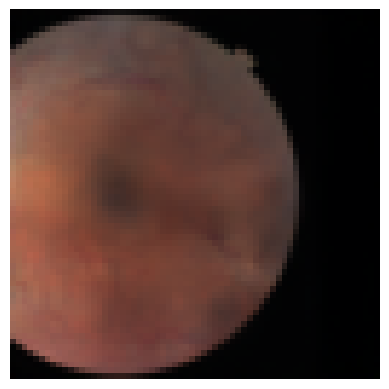

Keyboard interruption in main thread... closing server.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
# from accelerate import Accelerator

# accelerator = Accelerator()

# Load the pre-trained model
pipeline = DiffusionPipeline.from_pretrained("ankush-003/retinal_fundus")
# pipeline = pipeline.to(accelerator.device)

# pipeline.to("cuda")
# gradio function for generating image
# @accelerator.training_mode
def generate_image():
    image = pipeline().images[0]
    image.save("trial.png")
    img = plt.imread("trial.png")
    # Display the image (optional)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img

# gradio interface
import gradio as gr
iface = gr.Interface(fn=generate_image, inputs=None, outputs=[gr.Image(label="Generated Image", type="numpy", tool='editor')],
                title="Image Data Generator",
                description="This tool generates synthetic images using the DiffusionPipeline model.",
                article="### Using the Image Data Generator\n\nSimply click 'Generate Image' to create a synthetic image. The generated image will be displayed below.")
iface.launch(debug=True)

In [ ]:
# gradio function for generating image
def generate_image():
    image = pipeline().images[0]
    image.save("trial.png")
    img = Image.open("trial.png")
    # plt.imshow(img)
    # plt.axis("off")
    # plt.show()
    return img

# gradio interface
import gradio as gr
iface = gr.Interface(fn=generate_image, inputs=None, outputs="image")
iface.launch(debug=True)

In [1]:
# blocks ui
import numpy as np
import random
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
import gradio as gr

pipeline = DiffusionPipeline.from_pretrained("ankush-003/retinal_fundus")

def generate_image():
    image = pipeline().images[0]
    image.save("out.png")
    img = plt.imread("out.png")
    # Display the image (optional)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img

def generate_multiple(num):
    images = []
    for i in range(num):
      images.append(generate_image())
    return images

# gradio blocks ui
with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("""<h1 style="text-align: center;">Synthetic Image Generator</h1>""")
    with gr.Tab("Generate Single Image"):
      gr.Markdown("## Using the Synthetic Generator\n\nSimply click 'Generate Image' to create a synthetic image. The generated image will be displayed below.")
      gen_img = gr.Image(shape=(256,256), tool="select", type="numpy", label="Generated Image")
      gen_button = gr.Button("Generate", variant="primary")

    with gr.Tab("Generate Multiple Images"):
      gr.Markdown(
          """
          ## Using the Synthetic Image Generator to generate multiple images
          """
      )
      gen_number = gr.Slider(2, 5, step=1.0, label="Number of Images", info="Generate multiple images")
      gen_images = gr.Gallery(label="Generated Images").style(columns=[2], rows=[2], object_fit="contain", height="auto")
      gen_m_button = gr.Button("Generate Images", variant="primary")
    with gr.Accordion("Read More"):
        gr.Markdown("""
        - [Images used to train the model](https://ieee-dataport.org/open-access/retinal-fundus-multi-disease-image-dataset-rfmid)
        """)

    gen_button.click(generate_image, inputs=None, outputs=gen_img)
    gen_m_button.click(generate_multiple, inputs=gen_number, outputs=gen_images)

app.launch(debug=True)

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
import gradio as gr

pipeline = DiffusionPipeline.from_pretrained("ankush-003/retinal_fundus")

def generate_image():
    image = pipeline().images[0]
    image.save("out.png")
    img = plt.imread("out.png")
    # Display the image (optional)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img
import gradio as gr

def generate_multiple(num):
    images = []
    for i in range(num):
      images.append(generate_image())
    return images

with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("""<h1 style="text-align: center;">Synthetic Image Generator</h1>""")

    with gr.Tab("Generate Single Image"):
      with gr.Row():
        with gr.Column():
          gr.Markdown("""## Using the Synthetic Image Generator\n\nSimply click 'Generate Image' to create a synthetic image.\n""")
          gr.Image("/train.png",label="Training Image sample").style( rounded=True, scale=1)
          gen_button = gr.Button("Generate", variant="primary")
        gen_img = gr.Image( tool="select", type="numpy", label="Generated Image").style(height=512, width=512, rounded=True)

    with gr.Tab("Generate Multiple Images"):
      gr.Markdown(
          """
          ## Using the Synthetic Image Generator to generate multiple images
          """
      )
      gen_number = gr.Slider(2, 5, step=1.0, label="Number of Images", info="Generate multiple images")
      gen_images = gr.Gallery(label="Generated Images").style(columns=[2], rows=[2], object_fit="contain", height="auto")
      gen_m_button = gr.Button("Generate Images", variant="primary")

    with gr.Accordion("Read More"):
        gr.Markdown("""
        - [Images used to train the model](https://ieee-dataport.org/open-access/retinal-fundus-multi-disease-image-dataset-rfmid)
        """)

    gen_button.click(generate_image, inputs=None, outputs=gen_img)
    gen_m_button.click(generate_multiple, inputs=gen_number, outputs=gen_images)

app.launch(debug=True)

<ipython-input-16-cd9879441abb>:33: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gr.Image("/content/train.png",label="Training Image sample").style( rounded=True, scale=1)
<ipython-input-16-cd9879441abb>:35: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gen_img = gr.Image( tool="select", type="numpy", label="Generated Image").style(height=512, width=512, rounded=True)
<ipython-input-16-cd9879441abb>:44: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gen_images = gr.Gallery(label="Generated Images").style(columns=[2], rows=[2], object_fit="contain", height="auto")


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>